In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
img_path = "./output/cropped_frame.jpg"
img = cv2.imread(img_path)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Otsu's method for thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [5]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color range for segmentation (adjust these values as needed)
lower_color = np.array([30, 40, 40])
upper_color = np.array([90, 255, 255])
mask = cv2.inRange(hsv, lower_color, upper_color)


mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [12]:
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to draw the desired contours


inner_region_mask = np.zeros_like(mask)

# Draw the contours onto the blank mask
cv2.drawContours(inner_region_mask, contours, -1, (255), thickness=cv2.FILLED)

# Subtract the inner region mask from the original mask to get the desired region
desired_region_mask = cv2.bitwise_and(mask, cv2.bitwise_not(inner_region_mask))

# Find contours in the desired region mask
desired_contours, _ = cv2.findContours(desired_region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours of the desired region on the original image for visualization
outlined_image = img.copy()
cv2.drawContours(outlined_image, desired_contours, -1, (0, 255, 0), cv2.FILLED)

array([[[ 88, 142, 105],
        [ 88, 142, 105],
        [ 85, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 84, 141, 103],
        [ 85, 142, 104]],

       [[ 88, 142, 105],
        [ 88, 142, 105],
        [ 86, 143, 104],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       [[ 87, 141, 104],
        [ 87, 141, 104],
        [ 87, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       ...,

       [[ 76, 127,  93],
        [ 75, 126,  92],
        [ 75, 125,  91],
        ...,
        [ 80, 132,  95],
        [ 78, 132,  95],
        [ 77, 131,  94]],

       [[ 79, 130,  96],
        [ 76, 127,  93],
        [ 76, 126,  92],
        ...,
        [ 78, 130,  93],
        [ 75, 129,  92],
        [ 74, 128,  91]],

       [[ 80, 132,  95],
        [ 77, 129,  92],
        [ 77, 127,  93],
        ...,
        [ 76, 128,  91],
        [ 73, 127,  90],
        [ 72, 126,  89]]

In [13]:
coordinates = []
for contour in desired_contours:
    for point in contour:
        coordinates.append(tuple(point[0]))


In [10]:
coordinates

[(0, 0), (0, 100), (45, 100), (45, 0)]

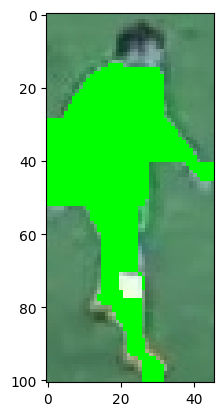

In [14]:
plt.imshow(outlined_image)

In [20]:
desired_contours

(array([[[ 17,  14]],
 
        [[ 16,  15]],
 
        [[ 15,  15]],
 
        [[ 14,  16]],
 
        [[ 13,  16]],
 
        [[ 10,  19]],
 
        [[ 10,  20]],
 
        [[  7,  23]],
 
        [[  7,  24]],
 
        [[  6,  25]],
 
        [[  6,  26]],
 
        [[  5,  27]],
 
        [[  5,  28]],
 
        [[  4,  29]],
 
        [[  0,  29]],
 
        [[  0,  52]],
 
        [[ 10,  52]],
 
        [[ 12,  54]],
 
        [[ 12,  56]],
 
        [[ 14,  58]],
 
        [[ 14,  59]],
 
        [[ 15,  60]],
 
        [[ 15,  76]],
 
        [[ 14,  77]],
 
        [[ 14,  78]],
 
        [[ 15,  79]],
 
        [[ 17,  79]],
 
        [[ 18,  80]],
 
        [[ 18,  81]],
 
        [[ 19,  82]],
 
        [[ 19,  83]],
 
        [[ 21,  85]],
 
        [[ 21,  86]],
 
        [[ 22,  87]],
 
        [[ 22,  92]],
 
        [[ 23,  93]],
 
        [[ 24,  93]],
 
        [[ 26,  95]],
 
        [[ 26, 100]],
 
        [[ 31, 100]],
 
        [[ 31,  96]],
 
        [[ 29,  

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "output/cropped_frame.jpg"
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for grass (you may need to adjust these values)
lower_grass = np.array([35, 40, 40])
upper_grass = np.array([85, 255, 255])

# Create a binary mask where the grass color range is met
grass_mask = cv2.inRange(hsv, lower_grass, upper_grass)

# Invert the grass mask to get the mask of the player
player_mask = cv2.bitwise_not(grass_mask)

# Perform morphological operations to remove small noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
player_mask = cv2.morphologyEx(player_mask, cv2.MORPH_CLOSE, kernel)
player_mask = cv2.morphologyEx(player_mask, cv2.MORPH_OPEN, kernel)

# Extract the player region
player_region = cv2.bitwise_and(image, image, mask=player_mask)

# Find contours in the player mask for visualization
contours, _ = cv2.findContours(player_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image for visualization
outlined_image = image.copy()
cv2.drawContours(outlined_image, contours, -1, (0, 255, 0), 2)

# Calculate the average color of the player region
mean_color = cv2.mean(player_region, mask=player_mask)[:3]  # Exclude the alpha channel if present


# cv2.imwrite(output_path, outlined_image)
plt.imshow(outlined_image)

# Display the result
# cv2.imshow("Outlined Player", outlined_image)
# cv2.imshow("Player Region", player_region)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# print(f"Outlined image saved at {output_path}")
print(f"Average color of the player region (BGR): {mean_color}")


NameError: name 'plt' is not defined